In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
raw_welfare = pd.read_spss('Koweps_hpc16_2021_beta1.sav')
welfare = raw_welfare.copy()

In [4]:
welfare = welfare.rename(
    columns = {'h16_g3' : 'sex',
               'p1602_8aq1' : 'income',
              'h16_g4' : 'birth'})
               

In [4]:
welfare['sex'].dtypes

dtype('float64')

In [ ]:
welfare['sex'].value_counts()

2.0    7219
1.0    5925
Name: sex, dtype: int64

In [27]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex'].value_counts()

female    7219
male      5925
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

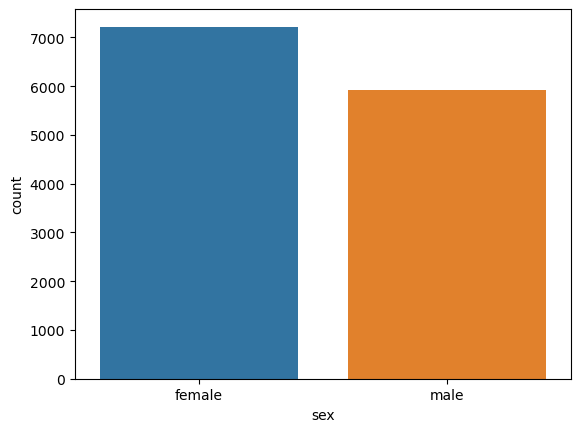

In [ ]:
sns.countplot(data = welfare, x= 'sex')

In [15]:
welfare['income'].dtypes

dtype('float64')

In [18]:
welfare['income'].describe() #‘Monthly wage’ means the average monthly wage for one month and is recorded in units of 10,000 won. (converted euro to 7.16 euro)


count    4313.000000
mean      283.703223
std       206.218524
min         0.000000
25%       153.000000
50%       243.000000
75%       370.000000
max      1752.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Count'>

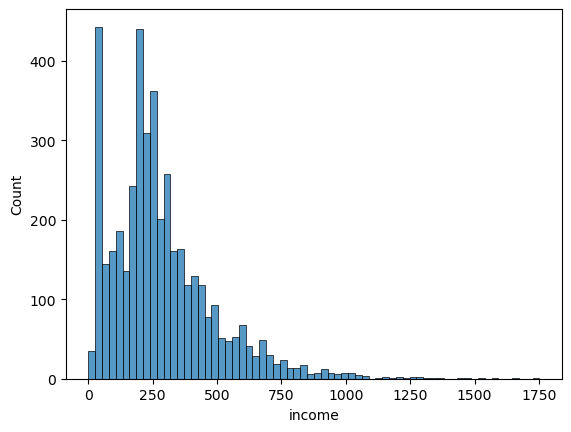

In [19]:
sns.histplot(data = welfare, x= 'income')

In [20]:
welfare['income'].isna().sum()

8831

In [40]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False)\
                    .agg(mean_income = ('income', 'mean'))

sex_income

,sex,mean_income
0,female,201.039418
1,male,364.434922


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

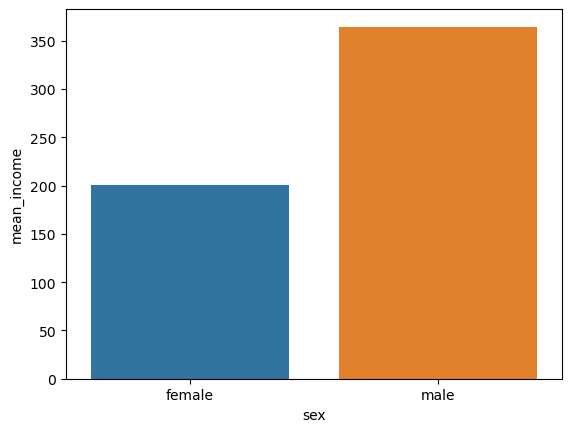

In [42]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

In [6]:
welfare['birth'].describe()

count    13144.000000
mean      1969.845785
std         24.398032
min       1907.000000
25%       1949.000000
50%       1968.000000
75%       1990.000000
max       2020.000000
Name: birth, dtype: float64

<AxesSubplot:xlabel='birth', ylabel='Count'>

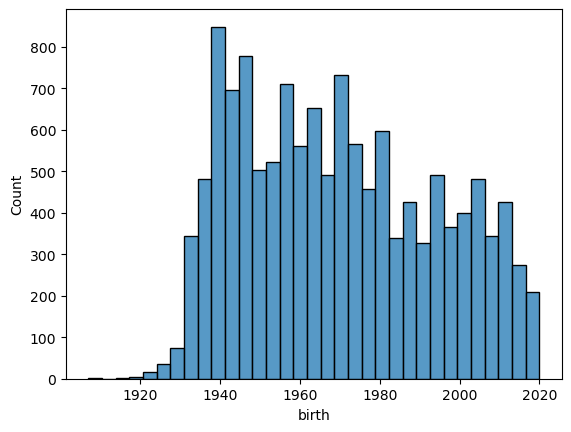

In [8]:
sns.histplot(data = welfare, x = "birth")

In [9]:
welfare = welfare.assign(age = 2020 - welfare['birth'] + 1)
welfare['age'].describe()

count    13144.000000
mean        51.154215
std         24.398032
min          1.000000
25%         31.000000
50%         53.000000
75%         72.000000
max        114.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

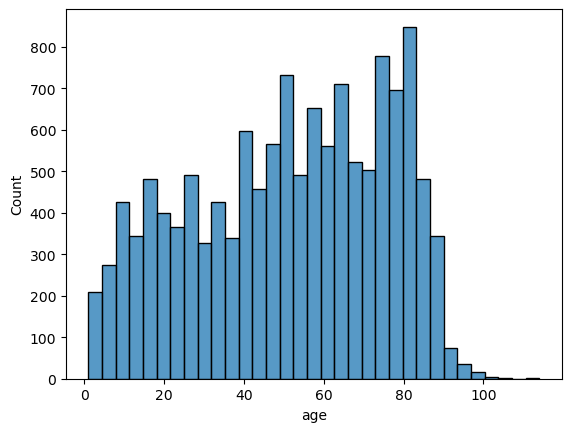

In [10]:
sns.histplot(data = welfare, x = 'age')

In [11]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,200.000000
20.0,98.375000
21.0,137.269231
22.0,168.909091
23.0,165.675676


<AxesSubplot:xlabel='age', ylabel='mean_income'>

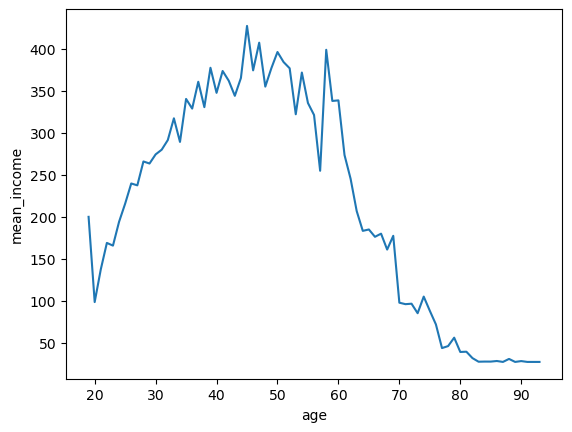

In [12]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

In [13]:
welfare['age'].head()

0    76.0
1    73.0
2    79.0
3    59.0
4    58.0
Name: age, dtype: float64

In [14]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', np.where(welfare['age'] <= 59, 'middle', 'old')))

welfare['ageg'].value_counts()

old       5569
middle    4479
young     3096
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

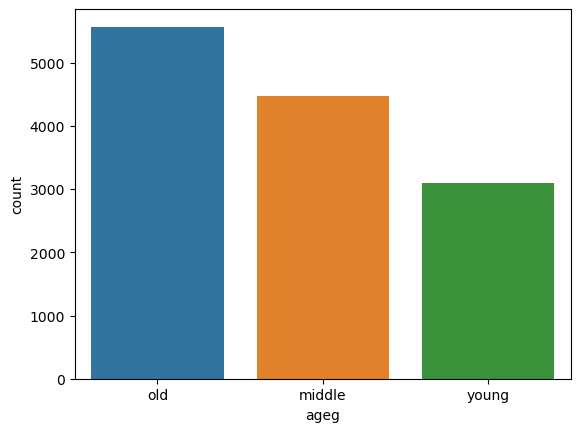

In [15]:
sns.countplot(data = welfare, x = 'ageg')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

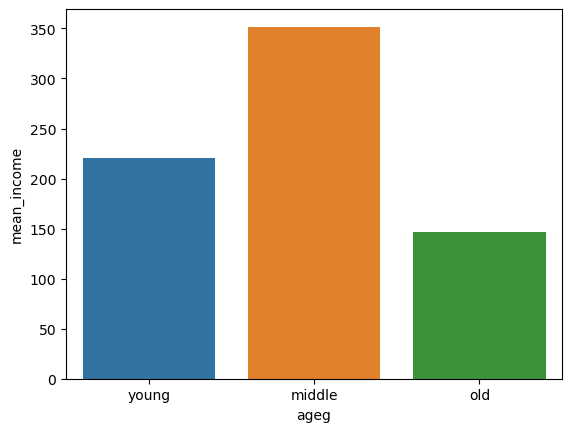

In [24]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income', order = ['young', 'middle', 'old'])


In [28]:
sex_income = \
    welfare.dropna(subset = ['income']) \
            .groupby(['ageg', 'sex'], as_index = False) \
            .agg(mean_income = ('income', 'mean'))

sex_income

,ageg,sex,mean_income
0,middle,female,254.465776
1,middle,male,429.468625
2,old,female,94.104839
3,old,male,214.729787
4,young,female,208.370607
5,young,male,237.990654


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

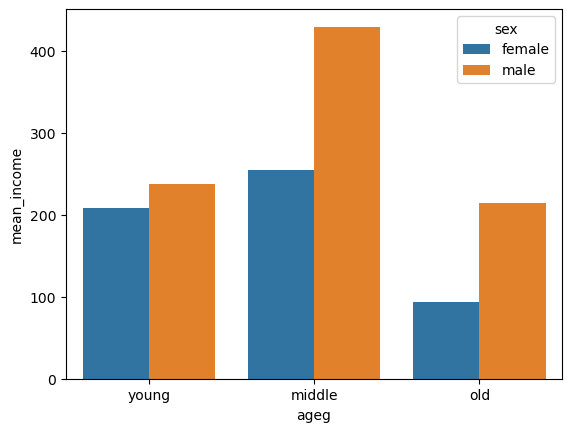

In [29]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

<AxesSubplot:xlabel='age', ylabel='mean_income'>

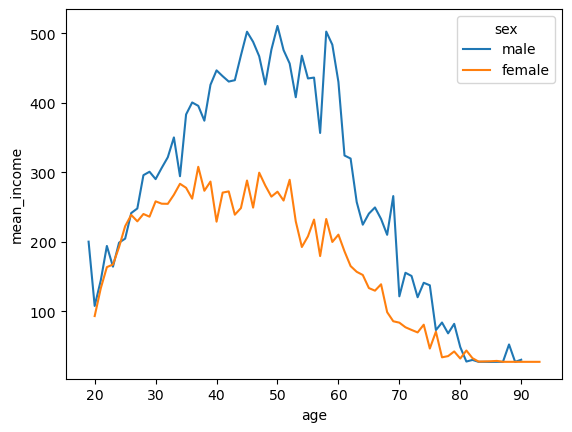

In [31]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')